In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from datetime import timedelta, datetime
import warnings
warnings.filterwarnings('ignore')

In [15]:
np.random.seed(42)

In [16]:
channels = ['Email', 'Social', 'Search', 'Display']
start_date = datetime(2023, 1, 1)
days = 90

In [17]:
data = []

for day in range(days):
    current_date = start_date + timedelta(days=day)
    for channel in channels:
        spend = np.random.uniform(200, 1000)
        impressions = np.random.randint(5000, 20000)
        ctr = np.random.uniform(0.01, 0.10)  # Click through rate
        clicks = int(impressions * ctr)
        cvr = np.random.uniform(0.05, 0.20)  # Conversion rate
        conversions = int(clicks * cvr)
        revenue = conversions * np.random.uniform(20, 150)  # Value per conversion

        data.append([
            current_date,
            channel,
            round(spend, 2),
            impressions,
            clicks,
            conversions,
            round(revenue, 2)
        ])


In [18]:
df_marketing = pd.DataFrame(data, columns=[
    'date', 'channel', 'spend', 'impressions',
    'clicks', 'conversions', 'revenue'
])

df_marketing.head()

,date,channel,spend,impressions,clicks,conversions,revenue
0,2023-01-01,Email,499.63,5860,155,25,2439.76
1,2023-01-01,Social,556.67,18526,282,50,4907.25
2,2023-01-01,Search,766.46,6685,100,15,2130.18
3,2023-01-01,Display,200.62,10051,266,25,2205.46
4,2023-01-02,Email,545.56,13666,889,63,3652.66


In [19]:
#calculated metrics
df_marketing['CTR'] = df_marketing['clicks'] / df_marketing['impressions']
df_marketing['CVR'] = df_marketing['conversions'] / df_marketing['clicks']
df_marketing['CPC'] = df_marketing['spend'] / df_marketing['clicks']
df_marketing['CPA'] = df_marketing['spend'] / df_marketing['conversions']
df_marketing['ROI'] = (df_marketing['revenue'] - df_marketing['spend']) / df_marketing['spend']

In [20]:
# Average performance per channel
channel_summary = df_marketing.groupby('channel')[['CTR', 'CVR', 'CPC', 'CPA', 'ROI']].mean().reset_index().round(4)
print(channel_summary)


   channel     CTR     CVR     CPC      CPA      ROI
0  Display  0.0573  0.1266  1.2792  11.4086  14.2041
1    Email  0.0530  0.1161  1.6806  16.3321  12.7443
2   Search  0.0494  0.1191  1.6913  14.5629   9.2346
3   Social  0.0552  0.1210  1.4604  13.7431  13.2623


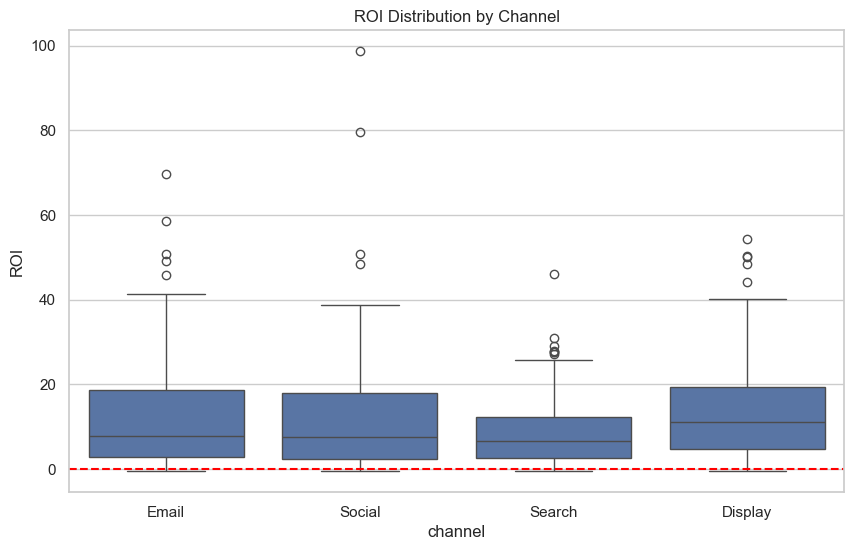

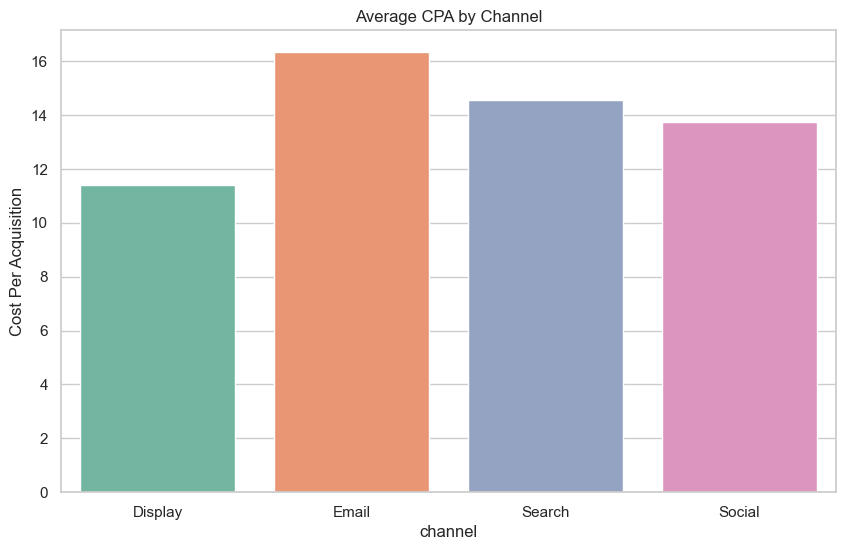

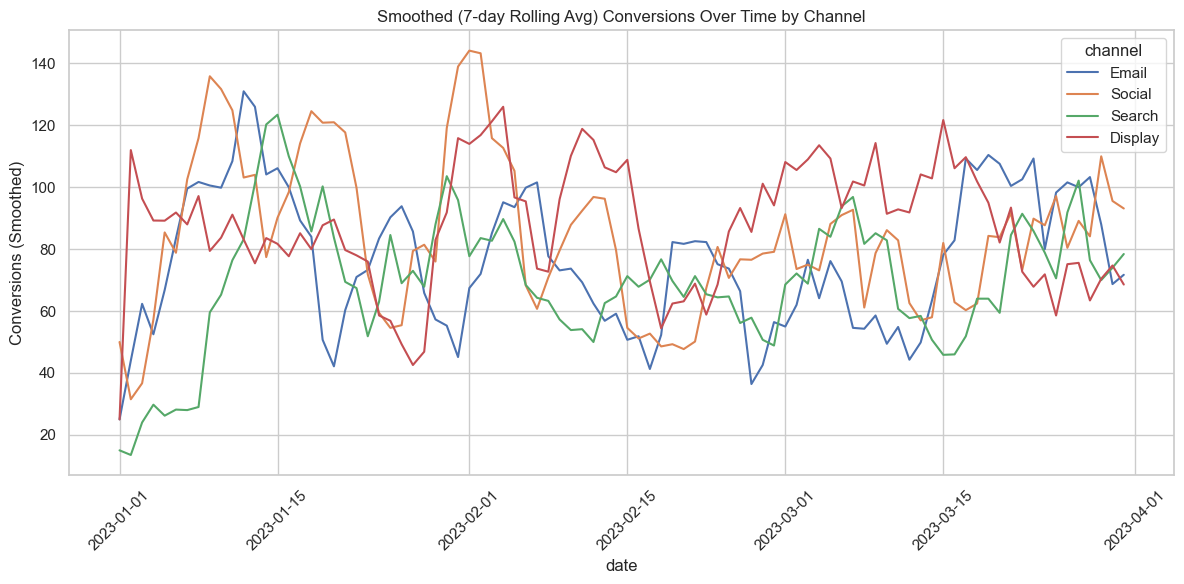

In [21]:
# Set style
sns.set(style='whitegrid')

# Boxplot of ROI by channel
plt.figure(figsize=(10,6))
sns.boxplot(data=df_marketing, x='channel', y='ROI')
plt.title("ROI Distribution by Channel")
plt.axhline(0, color='red', linestyle='--')
plt.show()

# CPA by channel
plt.figure(figsize=(10,6))
sns.barplot(data=channel_summary, x='channel', y='CPA', palette='Set2')
plt.title("Average CPA by Channel")
plt.ylabel("Cost Per Acquisition")
plt.show()

# Time trend of conversions
df_marketing['rolling_conversions'] = (
    df_marketing
    .groupby('channel')['conversions']
    .transform(lambda x: x.rolling(7, min_periods=1).mean())
)

# Plot smoothed conversions
plt.figure(figsize=(12,6))
sns.lineplot(data=df_marketing, x='date', y='rolling_conversions', hue='channel')
plt.title("Smoothed (7-day Rolling Avg) Conversions Over Time by Channel")
plt.ylabel("Conversions (Smoothed)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
# Top 5 campaign days by ROI
top_days = df_marketing.sort_values('ROI', ascending=False).head(5)
print("Top 5 Days by ROI:")
print(top_days[['date', 'channel', 'ROI', 'revenue', 'spend']])

# Worst 5 campaign days by CPA
bottom_days = df_marketing.sort_values('CPA', ascending=False).head(5)
print("Worst 5 Days by CPA:")
print(bottom_days[['date', 'channel', 'CPA', 'conversions', 'spend']])


Top 5 Days by ROI:
          date  channel        ROI   revenue   spend
17  2023-01-05   Social  98.675937  25839.99  259.24
61  2023-01-16   Social  79.560604  28632.85  355.42
16  2023-01-05    Email  69.590173  14912.88  211.26
232 2023-02-28    Email  58.528735  12357.57  207.59
7   2023-01-02  Display  54.351214  13950.72  252.04
Worst 5 Days by CPA:
          date  channel        CPA  conversions   spend
311 2023-03-19  Display  96.225000            4  384.90
6   2023-01-02   Search  82.215000           12  986.58
168 2023-02-12    Email  76.558000           10  765.58
275 2023-03-10  Display  76.111818           11  837.23
60  2023-01-16    Email  74.471667           12  893.66


#### Conclusion
##### Email and Search channels consistently showed higher conversion rates and lower CPA, suggesting these channels are more efficient for acquisition-focused campaigns.
##### olling average visualizations revealed that Email conversions remained the most stable, while Social and Display showed more volatility, indicating room for message optimization or targeting refinement.